In [1]:
####### Import all necessity functions ########
####### Import all necessity function for Deep Learning ########
import os
import cv2
import random 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, BatchNormalization, Dropout, Conv2D, MaxPool2D, MaxPool3D, Flatten
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, MSE, MAE, Huber
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam

In [2]:
######## import all necessity functions ##########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, silhouette_score, confusion_matrix

In [3]:
####### To access the Google Drive ########
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
####### To Unzip the folder #######
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN Dataset/X-ray.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
####### To Extract the image to the data #########
directory = '/content/X-ray'
#now we want to extract the cat and dog folder
data, categories = [], ['NORMAL', 'PNEUMONIA']

for i in categories:
    
    folder_path = os.path.join(directory,i)
    
    for image in os.listdir(folder_path):
        label = categories.index(i)
        filepath_ = os.path.join(folder_path, image)
        img_arr_  = cv2.imread(filepath_)
        img_arr_  = cv2.resize(img_arr_, (100,100))
        data.append([img_arr_, label])
    
    print(f"{i} is done.")

random.shuffle(data)

NORMAL is done.
PNEUMONIA is done.


In [6]:
####### Split the dataset into X and y ########
X = []
y = []
for value_ in data:
  X.append(value_[0])
  y.append(value_[1])

print("appending is done.")

appending is done.


In [7]:
####### Normalized the X and y ########
X = np.array(X)
y = np.array(y)
####### Take only 4000 data from the X and y ######
X = X[0:4000]
y = y[0:4000]
####### Divided the data by 255 #######
X = X/255

In [8]:
####### Train and test split ########
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2800, 100, 100, 3), (1200, 100, 100, 3), (2800,), (1200,))

In [9]:
####### Create a model #######
model = Sequential()

####### Create first Convolution layer with filters 128 and MaxPooling 2, 2 #######
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = "he_normal", input_shape = X.shape[1:]))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.7))
model.add(BatchNormalization())

####### Create second Convolution layer with filters 64 and MaxPooling 2, 2 ######
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', kernel_initializer = "he_normal"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.7))
model.add(BatchNormalization())

####### Faltten the model ########
model.add(Flatten())

####### Create first hidden layer with neurons 128 ########
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = HeNormal()))
model.add(Dropout(0.6))
model.add(BatchNormalization())

####### Create second hidden layer with 32 neurons #######
model.add(Dense(units = 32, activation = 'relu', kernel_initializer = HeNormal()))
model.add(Dropout(0.7))
model.add(BatchNormalization())


####### Create an output layer ########
model.add(Dense(units = 1, activation = 'sigmoid'))


####### Compile the model #######
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###### fit the model and run #######
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 256, verbose = 1)

Epoch 1/100
11/11 [==============================] - 6s 299ms/step - loss: 0.7702 - accuracy: 0.5539 - val_loss: 0.3897 - val_accuracy: 0.8517
Epoch 2/100
11/11 [==============================] - 1s 127ms/step - loss: 0.6363 - accuracy: 0.6418 - val_loss: 0.3015 - val_accuracy: 0.8958
Epoch 3/100
11/11 [==============================] - 1s 128ms/step - loss: 0.5402 - accuracy: 0.7225 - val_loss: 0.3334 - val_accuracy: 0.8383
Epoch 4/100
11/11 [==============================] - 1s 127ms/step - loss: 0.4747 - accuracy: 0.7832 - val_loss: 0.3939 - val_accuracy: 0.8042
Epoch 5/100
11/11 [==============================] - 1s 126ms/step - loss: 0.4132 - accuracy: 0.8179 - val_loss: 0.3442 - val_accuracy: 0.8217
Epoch 6/100
11/11 [==============================] - 1s 126ms/step - loss: 0.3864 - accuracy: 0.8525 - val_loss: 0.3257 - val_accuracy: 0.8258
Epoch 7/100
11/11 [==============================] - 1s 125ms/step - loss: 0.3420 - accuracy: 0.8911 - val_loss: 0.3051 - val_accuracy: 0.8317

In [10]:
pd.DataFrame(y).value_counts()

1    3057
0     943
dtype: int64

In [11]:
####### Print the model performance ########
predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)
print("accuracy is  = ", accuracy_score(y_test, predicted_))
print("recall   is  = ", recall_score(y_test, predicted_))
print("precision is = ", precision_score(y_test, predicted_))
print("f1_score is  = ", f1_score(y_test, predicted_))

accuracy is  =  0.965
recall   is  =  0.9936170212765958
precision is =  0.9628865979381444
f1_score is  =  0.9780104712041885


In [12]:
####### Check the model is performing good or bad ######
print(classification_report(predicted_, y_test))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       230
           1       0.99      0.96      0.98       970

    accuracy                           0.96      1200
   macro avg       0.93      0.97      0.95      1200
weighted avg       0.97      0.96      0.97      1200



In [13]:
######## print the confusion matrix ########
print(confusion_matrix(predicted_, y_test))

[[224   6]
 [ 36 934]]


Predicted value of this image is =  0.9921146 

This image person is NORMAL.


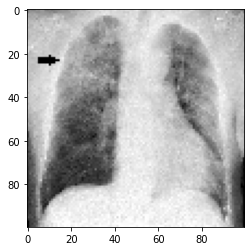

In [14]:
######## Do it for single prediction #########
from keras.preprocessing import image
img_pred = image.load_img(r"/content/drive/MyDrive/CNN Dataset/abnormal1.jpg", target_size = (100, 100))
plt.imshow(img_pred)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred/255
img_pred = np.expand_dims(img_pred, axis = 0)
result = model.predict(img_pred)
print("Predicted value of this image is = ", (np.array(result))[0][0],'\n')
if result >= 0.5:
  print("This image person is NORMAL.")
else:
  print("This image person is infected with PNEUMONIA.")

Functional Model for CNN - Convolutional Neural Network


In [15]:
####### Import all functions for this Functional ########
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0

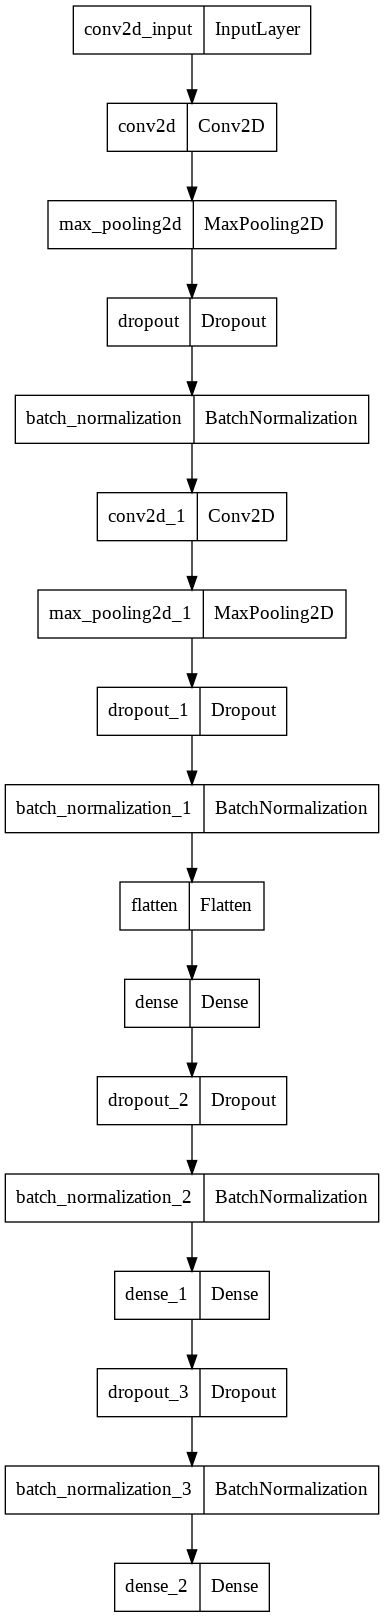

In [16]:
from keras.backend import concatenate
####### Create an input layer #######
inputLayer_ = Input(shape = (100, 100, 3))

# input layer
visible = Input(shape= X.shape[1:])
# first feature extractor
conv1 = Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', kernel_initializer = 'he_normal')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
drop1 = Dropout(0.7)(pool1)
flat1 = Flatten()(drop1)


# second feature extractor
conv2 = Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', kernel_initializer = 'he_normal')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
drop2 = Dropout(0.7)(pool2)
flat2 = Flatten()(drop2)


# merge feature extractors
merge = concatenate([flat1, flat2])

# interpretation layer
hidden1 = Dense(units = 128, activation='relu')(merge)
drop2 = Dropout(0.6)(hidden1)

hidden2 = Dense(units = 32, activation='relu')(drop2)
drop2 = Dropout(0.7)(hidden2)

# prediction output
output = Dense(1, activation='sigmoid')(hidden2)
model_ = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model)

In [17]:
####### Compile the model #######
model_.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###### fit the model and run #######
history_ = model_.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 256, verbose = 1)

Epoch 1/100
11/11 [==============================] - 3s 238ms/step - loss: 25.4694 - accuracy: 0.6425 - val_loss: 1.6049 - val_accuracy: 0.5417
Epoch 2/100
11/11 [==============================] - 2s 163ms/step - loss: 5.0629 - accuracy: 0.6761 - val_loss: 0.7382 - val_accuracy: 0.7975
Epoch 3/100
11/11 [==============================] - 2s 163ms/step - loss: 0.6109 - accuracy: 0.7429 - val_loss: 0.3602 - val_accuracy: 0.7833
Epoch 4/100
11/11 [==============================] - 2s 163ms/step - loss: 0.4711 - accuracy: 0.7354 - val_loss: 0.2670 - val_accuracy: 0.9158
Epoch 5/100
11/11 [==============================] - 2s 164ms/step - loss: 0.4389 - accuracy: 0.7332 - val_loss: 0.2718 - val_accuracy: 0.7833
Epoch 6/100
11/11 [==============================] - 2s 162ms/step - loss: 0.4072 - accuracy: 0.7475 - val_loss: 0.2553 - val_accuracy: 0.8175
Epoch 7/100
11/11 [==============================] - 2s 162ms/step - loss: 0.4002 - accuracy: 0.7607 - val_loss: 0.2535 - val_accuracy: 0.783

In [18]:
####### Print the model performance ########
predicted_ = np.where(model_.predict(X_test) > 0.5, 1, 0)
print("accuracy is  = ", accuracy_score(y_test, predicted_))
print("recall   is  = ", recall_score(y_test, predicted_))
print("precision is = ", precision_score(y_test, predicted_))
print("f1_score is  = ", f1_score(y_test, predicted_))

accuracy is  =  0.9741666666666666
recall   is  =  0.9840425531914894
precision is =  0.9829968119022316
f1_score is  =  0.9835194045720361


In [19]:
####### Check the model is performing good or bad ######
print(classification_report(predicted_, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       259
           1       0.98      0.98      0.98       941

    accuracy                           0.97      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.97      0.97      0.97      1200



In [20]:
######## print the confusion matrix ########
print(confusion_matrix(predicted_, y_test))

[[244  15]
 [ 16 925]]


Predicted value of this image is =  0.99994195 

This image person is NORMAL.


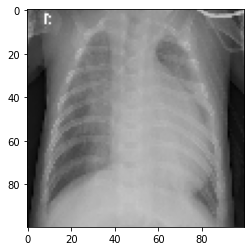

In [22]:
######## Do it for single prediction #########
from keras.preprocessing import image
img_pred = image.load_img(r"/content/drive/MyDrive/CNN Dataset/normal1.jpeg", target_size = (100, 100))
plt.imshow(img_pred)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred/255
img_pred = np.expand_dims(img_pred, axis = 0)
result = model_.predict(img_pred)
print("Predicted value of this image is = ", (np.array(result))[0][0],'\n')
if result >= 0.5:
  print("This image person is NORMAL.")
else:
  print("This image person is infected with PNEUMONIA.")